In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from itertools import combinations 

from collections import Counter

In [226]:
data = pd.read_csv('movie_bd_v5_1_.csv')
data.sample()

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
147,tt0831387,160000000,529076069,Godzilla,Aaron Taylor-Johnson|Ken Watanabe|Elizabeth Ol...,Gareth Edwards,A king's arrival is never silent.,Fifteen years after an 'incident' at a Japanes...,123,Action|Science Fiction|Thriller,Toho Company|Legendary Pictures|Warner Bros.|D...,5/14/2014,6.2,2014


# Предобработка

In [228]:
answers = {} # создадим словарь для ответов

# тут другие ваши предобработки колонок например:

data['profit'] = data.revenue - data.budget
data['release_date'] = pd.to_datetime(data['release_date'])
data['month'] = pd.DatetimeIndex(data['release_date']).month
data['title_length'] = data['original_title'].map(lambda x: len(x))
data['title_words'] = data['original_title'].map(lambda x: len(x.split()))

# 1. У какого фильма из списка самый большой бюджет?

Использовать варианты ответов в коде решения запрещено.    
Вы думаете и в жизни у вас будут варианты ответов?)

In [232]:
# в словарь вставляем номер вопроса и ваш ответ на него
answers['1'] = '5. Pirates of the Caribbean: On Stranger Tides (tt1298650) +'

In [233]:
data[data.budget == data.budget.max()].original_title

723    Pirates of the Caribbean: On Stranger Tides
Name: original_title, dtype: object

ВАРИАНТ 2

In [231]:
data.sort_values(ascending=False, by = 'budget').original_title.head(1)

723    Pirates of the Caribbean: On Stranger Tides
Name: original_title, dtype: object

# 2. Какой из фильмов самый длительный (в минутах)?

In [234]:
answers['2'] = '2. Gods and Generals (tt0279111) +'

In [235]:
data[data.runtime == data.runtime.max()].original_title

1157    Gods and Generals
Name: original_title, dtype: object

# 3. Какой из фильмов самый короткий (в минутах)?





In [236]:
answers['3'] = '3. Winnie the Pooh (tt1449283) +'

In [237]:
data[data.runtime == data.runtime.min()].original_title

768    Winnie the Pooh
Name: original_title, dtype: object

# 4. Какова средняя длительность фильмов?


In [238]:
answers['4'] = '2. 110 +'

In [239]:
data.runtime.mean()

109.6585494970884

# 5. Каково медианное значение длительности фильмов? 

In [240]:
answers['5'] = '1. 107 +'

In [241]:
data.runtime.median()

107.0

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [242]:
answers['6'] = '5. Avatar (tt0499549) +'

In [243]:
data[data.profit == data.profit.max()].original_title

239    Avatar
Name: original_title, dtype: object

# 7. Какой фильм самый убыточный?


In [291]:
answers['7'] = '5. The Lone Ranger (tt1210819)'

In [245]:
data[data.profit == data.profit.min()].original_title

1245    The Lone Ranger
Name: original_title, dtype: object

In [246]:
data.loc[data.original_title == "The Warrior's Way"]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit,month,title_length,title_words


Правильный ответ в системе помечен "The Warrior's Way", однако в дата-сете такого фильма нет. Я решала вторую часть проекта.ю там действительно это правильный ответ.

# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [247]:
answers['8'] = '1. 1478 +'

In [248]:
(data.revenue > data.budget).value_counts()

True     1478
False     411
dtype: int64

# 9. Какой фильм оказался самым кассовым в 2008 году?

In [249]:
answers['9'] = '4. The Dark Knight (tt0468569) +'

In [251]:
data[(data.release_year == 2008) & (data.profit.sort_values(ascending=False))].original_title.head(1)

599    The Dark Knight
Name: original_title, dtype: object

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [252]:
answers['10'] = '5. The Lone Ranger (tt1210819) +'

In [253]:
data2012_14 = data[(data.release_year >= 2012) & (data.release_year <= 2014)]
data2012_14[(data2012_14.revenue - data2012_14.budget) == (data2012_14.revenue - data2012_14.budget).min()].original_title

1245    The Lone Ranger
Name: original_title, dtype: object

# 11. Какого жанра фильмов больше всего?

In [256]:
answers['11'] = '3. Drama +'

In [192]:
pd.DataFrame(data.genres.str.split('|').tolist()).stack().value_counts().head(1)

Drama    782
dtype: int64

In [0]:
# эту задачу тоже можно решать разными подходами, попробуй реализовать разные варианты
# если будешь добавлять функцию - выноси ее в предобработку что в начале

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [254]:
answers['12'] = '1. Drama +'

In [255]:
pd.DataFrame(data[data.profit > 0].genres.str.split('|').tolist()).stack().value_counts().head(1)

Drama    560
dtype: int64

# 13. У какого режиссера самые большие суммарные кассовые сборы?

In [257]:
answers['13'] = '5. Peter Jackson +'

In [258]:
c = Counter()
for i, row in data.iterrows():
    names = row.director.split('|')

    for name in names:
        c[name] += row.profit
display(c.most_common(1))

[('Peter Jackson', 5202593685)]

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [259]:
answers['14'] = '3. Robert Rodriguez +'

In [260]:
count_directors = Counter()
for x in data.loc[data['genres'].str.contains('Action')].director.str.split('|'):
    count_directors += Counter(x)
display(count_directors.most_common(1))

[('Robert Rodriguez', 9)]

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [261]:
answers['15'] = '3. Chris Hemsworth +'

In [262]:
data_2012 = data[data['release_year'] == 2012]
c = Counter()
for i, row in data_2012.iterrows():
    names = row.cast.split('|')

    for name in names:
        c[name] += row.revenue
display(c.most_common(1))

[('Chris Hemsworth', 2027450773)]

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

In [263]:
answers['16'] = '3. Matt Damon +'

In [264]:
count_films = Counter()
for x in data.loc[data.budget > data.budget.mean()].cast.str.split('|'):
    count_films += Counter(x)
display(count_films.most_common(1))

[('Matt Damon', 18)]

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [265]:
answers['17'] = '2. Action +'

In [266]:
count_genres = Counter()
for x in data.loc[data['cast'].str.contains('Nicolas Cage')].genres.str.split('|'):
    count_genres += Counter(x)
display(count_genres.most_common(1))

[('Action', 17)]

# 18. Самый убыточный фильм от Paramount Pictures

In [267]:
answers['18'] = '1. K-19: The Widowmaker tt0267626 +'

In [268]:
data[data.profit == data.loc[data['production_companies'].str.contains('Paramount')].profit.min()].original_title

925    K-19: The Widowmaker
Name: original_title, dtype: object

# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [269]:
answers['19'] = '5. 2015 +'

In [270]:
data.groupby(by = ['release_year'])['revenue'].sum().sort_values(ascending=False).head(1)

release_year
2015    25449202382
Name: revenue, dtype: int64

In [345]:
profit_df = data.pivot_table(values = 'revenue', columns = 'release_year', aggfunc = 'sum')
profit_df.loc['revenue'].max()

25449202382

# 20. Какой самый прибыльный год для студии Warner Bros?

In [272]:
answers['20'] = '1. 2014 +'

In [273]:
data_Bros = data[data.production_companies.str.contains('Warner Bros')]
data_Bros.groupby(by = ['release_year'])['profit'].sum().sort_values(ascending=False).head(1)

release_year
2014    2295464519
Name: profit, dtype: int64

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [274]:
answers['21'] = '4. Сентябрь +'

In [8]:
data['release_date'] = pd.to_datetime(data['release_date'])
pd.DatetimeIndex(data['release_date']).month.value_counts().sort_values(ascending=False).head(1)

9    227
Name: release_date, dtype: int64

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [275]:
answers['22'] = '2. 450 +'

In [276]:
data['release_date'] = pd.to_datetime(data['release_date'])
data['month'] = pd.DatetimeIndex(data['release_date']).month
data_summer = data[(data.month >= 6) & (data.month <=8)]
len(data_summer)

450

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [277]:
answers['23'] = '5. Peter Jackson'

In [278]:
data['release_date'] = pd.to_datetime(data['release_date'])
data['month'] = pd.DatetimeIndex(data['release_date']).month
data_winter = data[(data.month <= 2) | (data.month == 12)]
pd.DataFrame(data_winter.director.str.split('|').tolist()).stack().value_counts(ascending=False).head(1)


Peter Jackson    7
dtype: int64

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [280]:
answers['24'] = '5. Four By Two Productions +'

In [279]:
all_cast=pd.DataFrame(data.production_companies.str.split('|', expand=True).stack(), columns=['production_companies']).reset_index()
rr=pd.merge(all_cast,data.title_length.reset_index(), left_on=['level_0'], right_on=['index'], how='left')
rr.groupby('production_companies')['title_length'].mean().sort_values(ascending=False)

production_companies
Four By Two Productions       83.0
Jim Henson Company, The       59.0
Dos Corazones                 47.0
Museum Canada Productions     46.0
Polsky Films                  46.0
                              ... 
Everest Entertainment          3.0
Berlanti Productions           3.0
XM2 Productions                2.0
Ixtlan Productions             2.0
Global Entertainment Group     2.0
Name: title_length, Length: 1771, dtype: float64

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [281]:
answers['25'] = '5. Total Entertainmen'

In [283]:
all_cast=pd.DataFrame(data.production_companies.str.split('|', expand=True).stack(), columns=['production_companies']).reset_index()
rr=pd.merge(all_cast,data.title_words.reset_index(), left_on=['level_0'], right_on=['index'], how='left')
rr.groupby('production_companies')['title_words'].mean().sort_values(ascending=False).head(10)

production_companies
Four By Two Productions      12.0
Jim Henson Company, The      10.0
Polsky Films                  9.0
The Saul Zaentz Company       9.0
Dos Corazones                 9.0
Cool Music                    8.0
Lucasfilm                     8.0
Museum Canada Productions     8.0
3Foot7                        8.0
Total Entertainment           8.0
Name: title_words, dtype: float64

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [284]:
answers['26'] = '1. Inside Out, The Dark Knight, 12 Years a Slave +'

In [285]:
data[data.vote_average > data.quantile(0.99, numeric_only=True).vote_average].original_title

9                                          Inside Out
34                                               Room
118                                      Interstellar
119                           Guardians of the Galaxy
125                                The Imitation Game
128                                         Gone Girl
138                          The Grand Budapest Hotel
370                                         Inception
599                                   The Dark Knight
872                                       The Pianist
1081    The Lord of the Rings: The Return of the King
1183                          The Wolf of Wall Street
1191                                 12 Years a Slave
1800                                          Memento
Name: original_title, dtype: object

# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [300]:
answers['27'] = '5. Daniel Radcliffe & Rupert Grint +'

In [299]:
c = Counter()
data_cast = pd.DataFrame(data.cast.str.split('|', expand=True).stack(), columns=['cast'])
for i in range(len(data)):
    com = data.loc[i]['cast'].split('|')
    a = list(combinations(com, 2))
    c += Counter(a)
print(c.most_common(1))

[(('Daniel Radcliffe', 'Rupert Grint'), 8)]


ВАРИАНТ 2

# Submission

In [307]:
# в конце можно посмотреть свои ответы к каждому вопросу
len(answers)

27

In [308]:
# и убедиться что ни чего не пропустил)
answers

{'1': '5. Pirates of the Caribbean: On Stranger Tides (tt1298650) +',
 '2': '2. Gods and Generals (tt0279111) +',
 '3': '3. Winnie the Pooh (tt1449283) +',
 '4': '2. 110 +',
 '5': '1. 107 +',
 '6': '5. Avatar (tt0499549) +',
 '7': '5. The Lone Ranger (tt1210819)',
 '8': '1. 1478 +',
 '9': '4. The Dark Knight (tt0468569) +',
 '10': '5. The Lone Ranger (tt1210819) +',
 '12': '1. Drama +',
 '11': '3. Drama +',
 '13': '5. Peter Jackson +',
 '14': '3. Robert Rodriguez +',
 '15': '3. Chris Hemsworth +',
 '16': '3. Matt Damon +',
 '17': '2. Action +',
 '18': '1. K-19: The Widowmaker tt0267626 +',
 '19': '5. 2015 +',
 '20': '1. 2014 +',
 '21': '4. Сентябрь +',
 '22': '2. 450 +',
 '23': '5. Peter Jackson +',
 '24': '5. Four By Two Productions +',
 '25': '5. Total Entertainmen',
 '26': '1. Inside Out, The Dark Knight, 12 Years a Slave +',
 '27': '5. Daniel Radcliffe & Rupert Grint +'}

30. Какой месяц чаще всего по годам самый прибыльный?
Варианты ответа:

Январь
Июнь
Декабрь
Сентябрь
Май

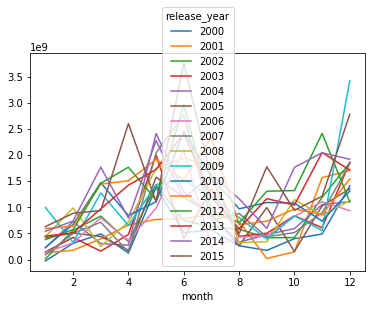

In [347]:
data.pivot_table(values = 'profit', index = 'month', columns = 'release_year', aggfunc = 'sum').plot()